In [8]:
import warnings
warnings.filterwarnings("ignore")

#Data handling with table-like data structures
import pandas as pd
import numpy as np
import math

#Modelling Helpers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

#Preprocessing
from sklearn.feature_selection import chi2

#Evaluation metrics:
from sklearn.metrics import accuracy_score,precision_score,precision_recall_curve,recall_score,f1_score,plot_roc_curve 

#Deep learning 
import keras.backend as K
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from keras.models import Sequential, load_model,Model
from keras.layers import Input, Conv2D, MaxPooling2D, Activation,BatchNormalization,Dense, Dropout, Flatten
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical

#Visulization
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

Using TensorFlow backend.


time: 2.29 s


## Loading & Preprocessing the Dataset

In [9]:
#Loading the dataset Fashion MNIST
train_data=pd.read_csv("train/train.csv")
test_data=pd.read_csv("test/testX.csv")

df_train=train_data.copy()
df_test=test_data.copy()

print("Train:",df_train.shape)
print("Test:",df_test.shape)
df_train.drop('Id',axis=1,inplace=True)

df_train.head()

Train: (60000, 786)
Test: (10000, 785)


,Label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,44,48,147,59,0,78,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,189,113,111,113,27,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,98,33,70,72,74,46,68,37,40,31,9,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


time: 6.54 s


In [10]:
#Features and label split
X=df_train.iloc[:,1:]
y=df_train['Label']

X_test=df_test.iloc[:,1:]

# Train and validation split function

def trainValSplit(x_data,seed=42):

    #Train and Validation Splitting
    X_train, X_val, y_train, y_val = train_test_split(x_data, y, test_size=0.2, random_state=seed)
        
    return X_train, X_val, y_train, y_val 

time: 6.3 ms


In [11]:
X_train, X_val, y_train, y_val = trainValSplit(X)

X_train = X_train.values.reshape((-1, 28, 28, 1))
X_val = X_val.values.reshape((-1, 28, 28, 1))
X_test = X_test.values.reshape((-1, 28, 28, 1))

time: 337 ms


In [12]:
X_train = X_train.astype("float32")/255
X_val = X_val.astype("float32")/255
X_test = X_test.astype("float32")/255

time: 138 ms


In [13]:
y_train = to_categorical(y_train, num_classes=5)
y_val = to_categorical(y_val, num_classes=5)

time: 11.3 ms


In [14]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(48000, 5)
(12000, 5)
time: 2.54 ms


**Before Pre-processing:**  
* We have 60,000 images in the training set & 10,000 images in the test set.
* They have shapes of (60000,28,28) and (10000,28,28) respectively.  

**After pre-processing:**  
* The training dataset retains it's 60,000 images
* The train dataset has been split into a 58000 train and 12000 validtion set.
* We have reshaped all the feature (X's) datasets into 3D tensors
* We have one-hot encoded all the label datasets to 5 classes

## CNN Model Developmentr

- 1 Convolution layer
- 3 Convolution layer
- 4 Convolution layer


### Using 1-Convolution layer

In [15]:
# Import Keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(64, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                346176    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 325       
Total params: 346,821
Trainable params: 346,821
Non-trainable params: 0
________________________________________________

In [16]:
history1= model1.fit(X_train, y_train,
          batch_size=256,
          epochs=50,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 8s 167us/step - loss: 0.7364 - accuracy: 0.6927 - val_loss: 0.5581 - val_accuracy: 0.7678
Epoch 2/50
48000/48000 [==============================] - 2s 35us/step - loss: 0.5000 - accuracy: 0.7995 - val_loss: 0.4414 - val_accuracy: 0.8227
Epoch 3/50
48000/48000 [==============================] - 2s 34us/step - loss: 0.4409 - accuracy: 0.8254 - val_loss: 0.4185 - val_accuracy: 0.8338
Epoch 4/50
48000/48000 [==============================] - 2s 35us/step - loss: 0.4064 - accuracy: 0.8394 - val_loss: 0.3817 - val_accuracy: 0.8492
Epoch 5/50
48000/48000 [==============================] - 2s 34us/step - loss: 0.3770 - accuracy: 0.8526 - val_loss: 0.3937 - val_accuracy: 0.8361
Epoch 6/50
48000/48000 [==============================] - 2s 34us/step - loss: 0.3600 - accuracy: 0.8572 - val_loss: 0.3450 - val_accuracy: 0.8662
Epoch 7/50
48000/48000 [==============================] - 2s 34us/s

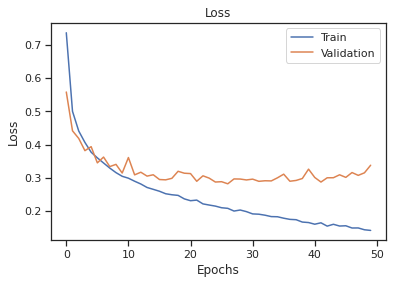

time: 220 ms


In [17]:
#graph plot for epochs and loss

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title("Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

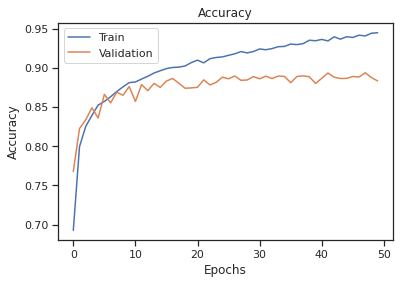

time: 200 ms


In [18]:
#graph plot for epochs and accuracy

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

**Training Accuracy: 94.49**
**Validation Accuracy:88.34**   
**Test Accuracy(from Kaggle): 84.12**

This explains that over model is **Over-Fitting**. The same pattern can be observed from the training and validation loss plot.

### Using 3-Convolution layer

In [19]:

model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model3.add(Dropout(0.4))

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dense(5, activation='softmax'))

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 128)        

In [20]:

history3 = model3.fit(X_train, y_train,
          batch_size=256,
          epochs=50,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 53us/step - loss: 0.8212 - accuracy: 0.6424 - val_loss: 0.5893 - val_accuracy: 0.7523
Epoch 2/50
48000/48000 [==============================] - 2s 45us/step - loss: 0.5588 - accuracy: 0.7679 - val_loss: 0.4948 - val_accuracy: 0.8014
Epoch 3/50
48000/48000 [==============================] - 2s 45us/step - loss: 0.4980 - accuracy: 0.7962 - val_loss: 0.4215 - val_accuracy: 0.8336
Epoch 4/50
48000/48000 [==============================] - 2s 45us/step - loss: 0.4606 - accuracy: 0.8116 - val_loss: 0.3991 - val_accuracy: 0.8402
Epoch 5/50
48000/48000 [==============================] - 2s 44us/step - loss: 0.4323 - accuracy: 0.8244 - val_loss: 0.3857 - val_accuracy: 0.8433
Epoch 6/50
48000/48000 [==============================] - 2s 44us/step - loss: 0.4173 - accuracy: 0.8317 - val_loss: 0.3678 - val_accuracy: 0.8481
Epoch 7/50
48000/48000 [==============================] - 2s 44us/st

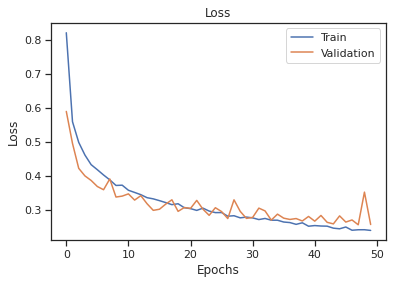

time: 194 ms


In [21]:
#graph plot for epochs and loss

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title("Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

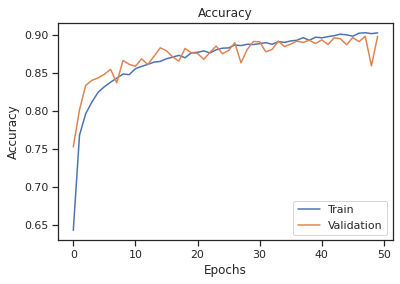

time: 204 ms


In [22]:
#graph plot for epochs and accuracy

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

**Training Accuracy: 90.27**  
**Validation Accuracy:89.84**  
**Test Accuracy(from Kaggle): 88.92**

Now, that we solved **over-fitting**. model3  gives better accuracy than model_1  for sure.  
Still the accuracy is not quite good.

### Using 4-Convolution layers

In [23]:
model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu', input_shape=(28,28,1)))
model4.add(BatchNormalization())

model4.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.2))

model4.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

model4.add(Conv2D(128, kernel_size=(3, 3),padding='same',activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.3))

model4.add(Flatten())

model4.add(Dense(512, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.4))

model4.add(Dense(128, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.4))

model4.add(Dense(5, activation='softmax'))

model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

time: 637 ms


In [24]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)       

In [25]:
history4 = model4.fit(X_train, y_train,
          batch_size=256,
          epochs=30,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 9s 184us/step - loss: 0.6728 - accuracy: 0.7346 - val_loss: 2.1000 - val_accuracy: 0.2976
Epoch 2/30
48000/48000 [==============================] - 7s 151us/step - loss: 0.4645 - accuracy: 0.8129 - val_loss: 1.1041 - val_accuracy: 0.5477
Epoch 3/30
48000/48000 [==============================] - 7s 150us/step - loss: 0.4097 - accuracy: 0.8362 - val_loss: 0.4843 - val_accuracy: 0.8075
Epoch 4/30
48000/48000 [==============================] - 7s 150us/step - loss: 0.3775 - accuracy: 0.8499 - val_loss: 0.4279 - val_accuracy: 0.8282
Epoch 5/30
48000/48000 [==============================] - 7s 150us/step - loss: 0.3618 - accuracy: 0.8545 - val_loss: 0.3816 - val_accuracy: 0.8436
Epoch 6/30
48000/48000 [==============================] - 7s 149us/step - loss: 0.3409 - accuracy: 0.8652 - val_loss: 0.3183 - val_accuracy: 0.8720
Epoch 7/30
48000/48000 [==============================] - 7s 1

In [26]:
model4.save("mod4_copy.h5")

time: 184 ms


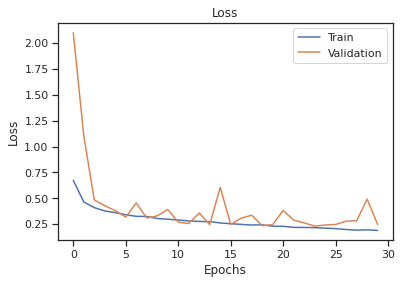

time: 219 ms


In [27]:
#graph plot for epochs and loss

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title("Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()


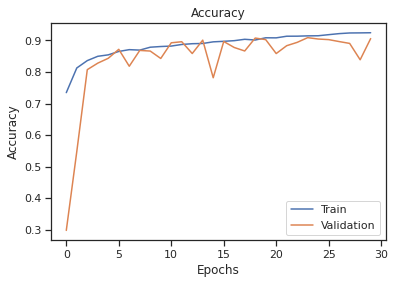

time: 206 ms


In [28]:
#graph plot for epochs and accuracy

plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

**Training Accuracy: 92.91**  
**Validation Accuracy: 90.630**  
**Test Accuracy(from Kaggle): 90.280**


### Model 5 - Adding kernel regulaizer to model 4

In [30]:
model5 = Sequential()
model5.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.0015),input_shape=(28,28,1)))
model5.add(BatchNormalization())

model5.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.0015)))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.2))

model5.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.0015)))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))

model5.add(Conv2D(128, kernel_size=(3, 3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.0015)))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.3))

model5.add(Flatten())

model5.add(Dense(512, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.4))

model5.add(Dense(128, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.4))

model5.add(Dense(5, activation='softmax'))

model5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

time: 530 ms


In [31]:
history5 = model5.fit(X_train, y_train,
          batch_size=256,
          epochs=30,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 9s 179us/step - loss: 0.8990 - accuracy: 0.7385 - val_loss: 2.0036 - val_accuracy: 0.2425
Epoch 2/30
48000/48000 [==============================] - 7s 150us/step - loss: 0.6448 - accuracy: 0.8175 - val_loss: 1.7571 - val_accuracy: 0.4415
Epoch 3/30
48000/48000 [==============================] - 7s 150us/step - loss: 0.5620 - accuracy: 0.8353 - val_loss: 0.5683 - val_accuracy: 0.8244
Epoch 4/30
48000/48000 [==============================] - 7s 150us/step - loss: 0.5160 - accuracy: 0.8433 - val_loss: 0.4398 - val_accuracy: 0.8721
Epoch 5/30
48000/48000 [==============================] - 7s 150us/step - loss: 0.4594 - accuracy: 0.8563 - val_loss: 0.4482 - val_accuracy: 0.8541
Epoch 6/30
48000/48000 [==============================] - 7s 150us/step - loss: 0.4357 - accuracy: 0.8599 - val_loss: 0.3607 - val_accuracy: 0.8865
Epoch 7/30
48000/48000 [==============================] - 7s 1

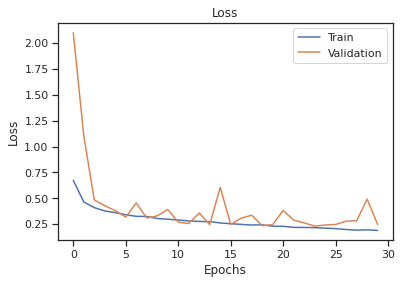

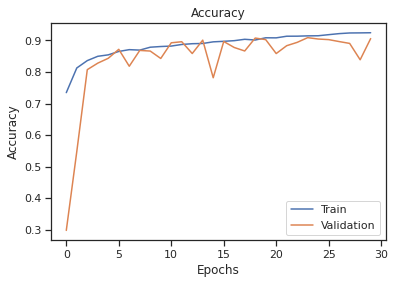

time: 405 ms


In [32]:
#graph plot for epochs and loss

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title("Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

#graph plot for epochs and accuracy

plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

## CNN5 - Data augmentation to model 4

In [33]:
cnn5 = Sequential()
cnn5.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu', input_shape=(28,28,1)))
cnn5.add(BatchNormalization())

cnn5.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu'))
cnn5.add(BatchNormalization())
cnn5.add(MaxPooling2D(pool_size=(2, 2)))
cnn5.add(Dropout(0.2))

cnn5.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu'))
cnn5.add(BatchNormalization())
cnn5.add(Dropout(0.2))

cnn5.add(Conv2D(128, kernel_size=(3, 3),padding='same',activation='relu'))
cnn5.add(BatchNormalization())
cnn5.add(MaxPooling2D(pool_size=(2, 2)))
cnn5.add(Dropout(0.3))

cnn5.add(Flatten())

cnn5.add(Dense(512, activation='relu'))
cnn5.add(BatchNormalization())
cnn5.add(Dropout(0.4))

cnn5.add(Dense(128, activation='relu'))
cnn5.add(BatchNormalization())
cnn5.add(Dropout(0.4))

cnn5.add(Dense(5, activation='softmax'))

cnn5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

time: 505 ms


In [34]:

from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=256)

time: 2.15 ms


In [35]:
history5 = cnn5.fit_generator(batches, steps_per_epoch=48000//256, epochs=150,
                    validation_data=(X_val,y_val), use_multiprocessing=True)

Epoch 1/150
187/187 [==============================] - 21s 112ms/step - loss: 0.7701 - accuracy: 0.6940 - val_loss: 3.7839 - val_accuracy: 0.1982
Epoch 2/150
187/187 [==============================] - 20s 106ms/step - loss: 0.5513 - accuracy: 0.7762 - val_loss: 0.8719 - val_accuracy: 0.6260
Epoch 3/150
187/187 [==============================] - 20s 107ms/step - loss: 0.4989 - accuracy: 0.7962 - val_loss: 0.4649 - val_accuracy: 0.8173
Epoch 4/150
187/187 [==============================] - 20s 105ms/step - loss: 0.4662 - accuracy: 0.8117 - val_loss: 0.3925 - val_accuracy: 0.8441
Epoch 5/150
187/187 [==============================] - 20s 106ms/step - loss: 0.4478 - accuracy: 0.8180 - val_loss: 0.4236 - val_accuracy: 0.8263
Epoch 6/150
187/187 [==============================] - 20s 105ms/step - loss: 0.4367 - accuracy: 0.8234 - val_loss: 0.8590 - val_accuracy: 0.6974
Epoch 7/150
187/187 [==============================] - 20s 105ms/step - loss: 0.4249 - accuracy: 0.8278 - val_loss: 0.5074 -

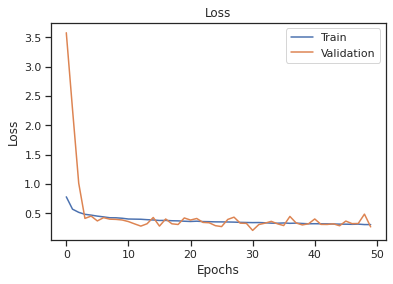

time: 139 ms


In [0]:
#graph plot for epochs and loss

plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title("Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

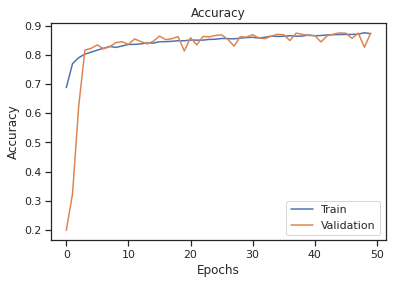

time: 147 ms


In [0]:
#graph plot for epochs and accuracy

plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

## Evaluating Model 4 using sample test data taken away from train dataset

Here, we split the Train dataset into 1:1:8. So, that we get train, validation and test set.

In [38]:
#Features and label split
X=df_train.iloc[:,1:]
y=df_train['Label']

X_test=df_test.iloc[:,1:]

# Train and validation split function

def trainValSplit(x_data,y=y,seed=42):

    #Train and Validation Splitting
    X_train, X_val, y_train, y_val = train_test_split(x_data, y, test_size=0.15, random_state=seed)
        
    return X_train, X_val, y_train, y_val

time: 4.78 ms


In [54]:
X_train, X_val, y_train, y_val = trainValSplit(X)
X_train,X_test,y_train,y_test = trainValSplit(X_train,y_train)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(43350, 784)
(9000, 784)
(7650, 784)
time: 680 ms


In [55]:
# X_train, X_val, y_train, y_val = trainValSplit(X)

X_train = X_train.values.reshape((-1, 28, 28, 1))
X_val = X_val.values.reshape((-1, 28, 28, 1))
X_test = X_test.values.reshape((-1, 28, 28, 1))

time: 2.48 ms


In [56]:
X_train = X_train.astype("float32")/255
X_val = X_val.astype("float32")/255
X_test = X_test.astype("float32")/255

time: 131 ms


In [57]:
y_train = to_categorical(y_train, num_classes=5)
y_val = to_categorical(y_val, num_classes=5)
y_test1 = to_categorical(y_test,num_classes=5)

time: 5.34 ms


In [44]:
model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu', input_shape=(28,28,1)))
model4.add(BatchNormalization())

model4.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.2))

model4.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

model4.add(Conv2D(128, kernel_size=(3, 3),padding='same',activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.3))

model4.add(Flatten())

model4.add(Dense(512, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.4))

model4.add(Dense(128, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.4))

model4.add(Dense(5, activation='softmax'))

model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

time: 479 ms


In [45]:
history4 = model4.fit(X_train, y_train,
          batch_size=256,
          epochs=30,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 43350 samples, validate on 9000 samples
Epoch 1/30
43350/43350 [==============================] - 7s 160us/step - loss: 0.6873 - accuracy: 0.7299 - val_loss: 3.4438 - val_accuracy: 0.2002
Epoch 2/30
43350/43350 [==============================] - 6s 137us/step - loss: 0.4746 - accuracy: 0.8094 - val_loss: 1.8427 - val_accuracy: 0.3692
Epoch 3/30
43350/43350 [==============================] - 6s 137us/step - loss: 0.4176 - accuracy: 0.8337 - val_loss: 0.9454 - val_accuracy: 0.6340
Epoch 4/30
43350/43350 [==============================] - 6s 137us/step - loss: 0.3889 - accuracy: 0.8443 - val_loss: 0.3989 - val_accuracy: 0.8311
Epoch 5/30
43350/43350 [==============================] - 6s 137us/step - loss: 0.3629 - accuracy: 0.8544 - val_loss: 0.3797 - val_accuracy: 0.8490
Epoch 6/30
43350/43350 [==============================] - 6s 138us/step - loss: 0.3543 - accuracy: 0.8591 - val_loss: 0.3279 - val_accuracy: 0.8710
Epoch 7/30
43350/43350 [==============================] - 6s 13

In [52]:
score4 = model4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.3072361828065386
Test accuracy: 0.8908496499061584
time: 1.1 s


In [59]:
# get the predictions for the test data
predicted_classes = model4.predict_classes(X_test)



from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(5)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.92      0.99      0.95      1568
     Class 1       0.83      0.89      0.86      1446
     Class 2       0.85      0.83      0.84      1572
     Class 3       0.90      0.84      0.87      1567
     Class 4       0.96      0.91      0.94      1497

    accuracy                           0.89      7650
   macro avg       0.89      0.89      0.89      7650
weighted avg       0.89      0.89      0.89      7650

time: 842 ms


## ResNet50 using Transfer learning 

In [0]:
#Features and label split
X=df_train.iloc[:,1:]
y=df_train['Label']

X_test=df_test.iloc[:,1:]

# Train and validation split function

def trainValSplit(x_data,seed=42):

    #Train and Validation Splitting
    X_train, X_val, y_train, y_val = train_test_split(x_data, y, test_size=0.2, random_state=seed)
        
    return X_train, X_val, y_train, y_val 

time: 5.16 ms


In [0]:
# X_train, X_val, y_train, y_val = trainValSplit(X)

# reshape dataset to have a single channel
trainX = X.values.reshape((-1, 28, 28, 1))

testX = X_test.values.reshape((-1, 28, 28, 1))

# one hot encode target values
trainY = to_categorical(y,num_classes=5)


time: 4.23 ms


In [0]:
trainX_norm=trainX.astype("float32")/255

testX_norm=testX.astype("float32")/255

time: 130 ms


In [0]:
# Reshape 2d to 3d array
im_rows = 28 # height
im_cols = 28 # width
batch_size = 512 # size of batch
im_shape = (im_rows, im_cols, 1) # shape of array 28*28*1

time: 1.38 ms


In [0]:
# To train on ResNet50 model pad zeros to make 28*28*1 array to 32*32*3 array
trainX_norm = np.pad(trainX_norm,((0,0),(2,2),(2,2),(1,1)), mode='constant', constant_values=0)
testX_norm = np.pad(testX_norm,((0,0),(2,2),(2,2),(1,1)), mode='constant', constant_values=0)


print('X_train shape:{}'.format(trainX_norm.shape))
print('X_test shape:{}'.format(testX_norm.shape))


X_train shape:(60000, 32, 32, 3)
X_test shape:(10000, 32, 32, 3)
time: 580 ms


In [0]:
import tensorflow as tf
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D, Flatten

resnet_model=ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3))

model=Sequential()
model.add(resnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(.3))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))
for layer in resnet_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False


model.summary()



/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_13[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

time: 42 ms


In [0]:
# Train the model
history = model.fit(trainX_norm, trainY,
         batch_size=256, epochs=400,
         validation_split=0.2,
         verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/400
48000/48000 [==============================] - 11s 226us/step - loss: 1.2025 - accuracy: 0.4582 - val_loss: 1.0497 - val_accuracy: 0.5243
Epoch 2/400
48000/48000 [==============================] - 10s 201us/step - loss: 0.9842 - accuracy: 0.5740 - val_loss: 0.9045 - val_accuracy: 0.6177
Epoch 3/400
48000/48000 [==============================] - 10s 201us/step - loss: 0.8736 - accuracy: 0.6306 - val_loss: 0.8210 - val_accuracy: 0.6615
Epoch 4/400
48000/48000 [==============================] - 10s 203us/step - loss: 0.8218 - accuracy: 0.6521 - val_loss: 0.7826 - val_accuracy: 0.6795
Epoch 5/400
48000/48000 [==============================] - 10s 202us/step - loss: 0.7831 - accuracy: 0.6697 - val_loss: 0.8291 - val_accuracy: 0.6507
Epoch 6/400
48000/48000 [==============================] - 10s 202us/step - loss: 0.7695 - accuracy: 0.6740 - val_loss: 0.7269 - val_accuracy: 0.7032
Epoch 7/400
48000/48000 [=========================

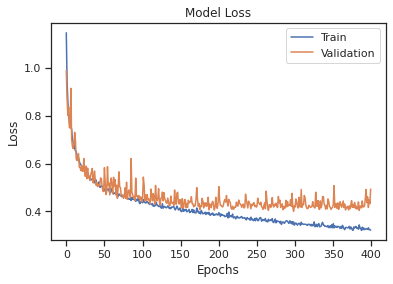

time: 148 ms


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

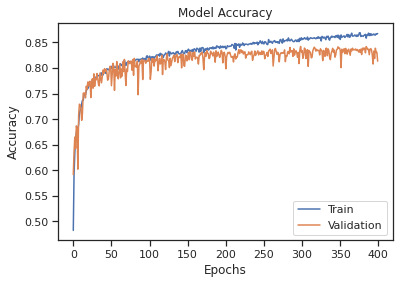

time: 152 ms


In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()